In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# dataset.CIFAR10

# train, test로 나눠서 데이터를 가져오시고
# classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# 데이터셋에서 무작위로 16장의 이미지를 추출해서 아래와 같이 출력하세요
# [C, H, W] -> [H, W, C]
# .transpose((1,2,0))

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

100%|██████████| 170M/170M [00:06<00:00, 27.6MB/s]


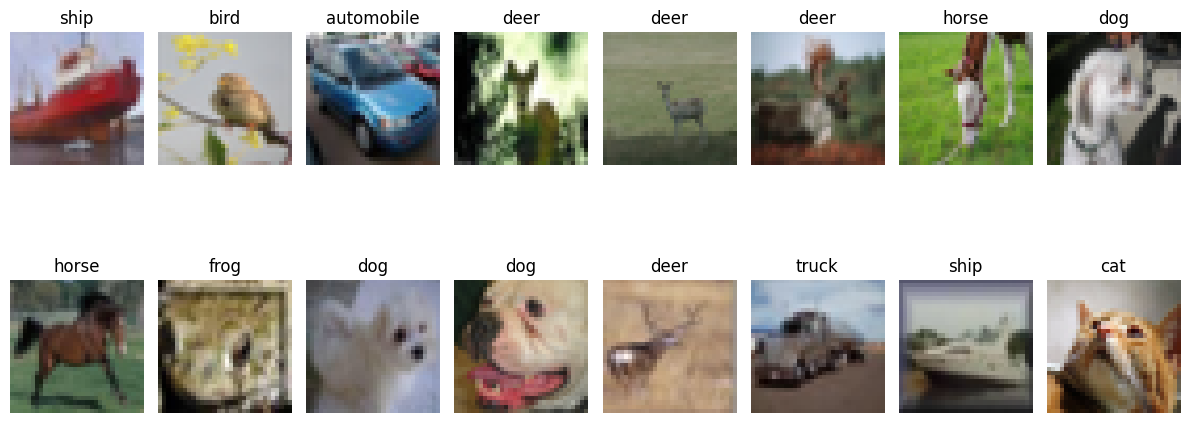

In [ ]:
import torch
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋 클래스 이름 리스트 (라벨 번호와 매칭됨)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# 학습 데이터셋을 DataLoader로 감쌈
# batch_size=16: 한 번에 16개의 이미지와 라벨을 가져옴
# shuffle=True: 매 epoch마다 데이터 순서를 섞음 (학습 성능 향상을 위해)
data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# 데이터로더에서 하나의 배치를 꺼냄
# images: [16, 3, 32, 32] → 이미지 16개, 각 이미지가 RGB(3채널), 32x32 크기
# labels: [16] → 각 이미지의 클래스 라벨
images, labels = next(iter(data_loader))

# 전체 그림 크기 지정 (12인치 x 6인치)
plt.figure(figsize=(12, 6))

# 배치 내의 16장 이미지 각각을 순서대로 subplot에 그림
for i in range(16):
    # 2행 8열의 subplot 중 (i+1)번째 위치 지정
    plt.subplot(2, 8, i + 1)

    # PyTorch 텐서를 numpy 배열로 변환 후, 차원 순서 변경
    # [C, H, W] → [H, W, C]로 바꿔줘야 matplotlib이 이미지로 인식함
    img = images[i].numpy().transpose((1, 2, 0))

    plt.imshow(img)

    # 해당 이미지의 클래스 이름을 제목으로 표시
    plt.title(classes[labels[i]])

    # 축 눈금 제거 (이미지만 보기 좋게 출력하기 위해)
    plt.axis('off')

# 겹치지 않게
plt.tight_layout()

plt.show()


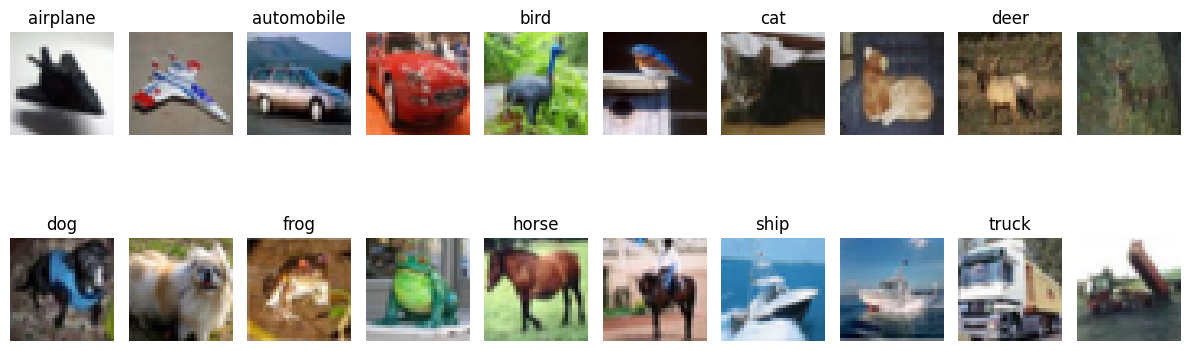

In [ ]:
# train dataset에서 쌓여진 데이터의 순서대로 각 클래스별로 2장씩 출력해주세요


# 각 클래스(0~9)별로 이미지를 저장할 빈 리스트 딕셔너리 먼저 만들어 두기!
# 예: {0: [], 1: [], ..., 9: []}
class_images = {i: [] for i in range(10)}

# train_dataset 전체를 순회하면서 각 클래스별로 이미지 2장씩만 수집하게 for문 돌려/ 딥러닝 아니라 파이썬 문법을 모르면 못한다......
for img, label in train_dataset:
  # 해당 클래스(label)에 저장된 이미지가 2개 미만일 경우에만 추가
  if len(class_images[label]) < 2:
    class_images[label].append(img)

  # 모든 클래스에 이미지가 2개씩 채워졌는지 확인하고, 채워졌다면 반복 종료
  if all(len(imgs) == 2 for imgs in class_images.values()):
    break

plt.figure(figsize=(12, 5))

for class_idx in range(10):
  # 각 클래스별로 이미지 2장씩 출력
  for j in range(2):
    # subplot의 인덱스를 계산 (총 20장의 이미지를 2행 10열로 배치)
    idx = class_idx * 2 + j

    # subplot의 위치 설정 (2행 10열 중 현재 이미지 위치에 그림)
    plt.subplot(2, 10, idx + 1)

    # 이미지 데이터를 넘파이로 변환하고, 채널 순서(HWC)로 변경
    img = class_images[class_idx][j].numpy().transpose(1, 2, 0)
    plt.imshow(img)

    # 첨에 있는 이미지에만 클래스 이름을 제목으로 표시
    if j == 0:
      plt.title(classes[class_idx])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True) # 매 epoch마다 데이터를 섞어서 학습에 사용

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False) # 테스트는 항상 같은 순서로 평가 (재현성 확보를 위해 섞지 않음)

In [ ]:
# 모델을 create하시고, traing을 거친 후 accuracy를 계산해보세요
# loss, optimizer
# epoch = 15


# 클래스 수 K 설정
K = len(set(train_dataset.targets))  # 예: CIFAR-10이면 10개

# CNN 모델 클래스 정의
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()

        # 입력 채널: 3(RGB), 출력 채널: 32, 커널 사이즈 3, 스트라이드 2
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)

        # 마지막 conv 출력은 (128, 3, 3)이라고 가정하고 flatten 후 fully connected
        self.fc1 = nn.Linear(128 * 3 * 3, 1024)
        self.fc2 = nn.Linear(1024, K)

    def forward(self, x):
        # Convolution + ReLU 적용
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))

        # flatten(batch_size, 128*3*3)
        x = x.view(-1, 128 * 3 * 3)

        # dropout과 FC layer
        x = F.dropout(x, p=0.5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2)

        # 마지막 출력층 (로짓 반환)
        x = self.fc2(x)
        return x

# 모델 인스턴스 생성
model = CNN(K)


In [ ]:
# 트레이닝부터!

def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs) :
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    model.train()
    train_loss = []
    t0 = datetime.now()
    for inputs, targets in train_loader:
      optimizer.zero_grad()
      # 순전파
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      # 역전파
      loss.backward()
      optimizer.step()
      train_loss.append(loss.item())
    train_loss = np.mean(train_loss)


    model.eval()
    test_loss = []
    for inputs, targets in test_loader:
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())

    test_loss = np.mean(test_loss)
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f"Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}")
  return train_losses, test_losses


In [ ]:
from datetime import datetime
import torch.nn.functional as F
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15, Train Loss: 1.6583, Test Loss: 1.4368, Duration: 0:00:51.235725
Epoch 2/15, Train Loss: 1.3705, Test Loss: 1.3033, Duration: 0:00:55.496564
Epoch 3/15, Train Loss: 1.2416, Test Loss: 1.2144, Duration: 0:00:57.436753
Epoch 4/15, Train Loss: 1.1509, Test Loss: 1.1735, Duration: 0:00:49.801853
Epoch 5/15, Train Loss: 1.0725, Test Loss: 1.1177, Duration: 0:00:52.899760
Epoch 6/15, Train Loss: 1.0050, Test Loss: 1.1366, Duration: 0:00:53.118262
Epoch 7/15, Train Loss: 0.9567, Test Loss: 1.0405, Duration: 0:00:50.002314
Epoch 8/15, Train Loss: 0.9047, Test Loss: 1.0130, Duration: 0:00:49.515456
Epoch 9/15, Train Loss: 0.8617, Test Loss: 0.9967, Duration: 0:00:50.399764
Epoch 10/15, Train Loss: 0.8345, Test Loss: 0.9751, Duration: 0:00:49.547403
Epoch 11/15, Train Loss: 0.7932, Test Loss: 0.9744, Duration: 0:00:49.905649
Epoch 12/15, Train Loss: 0.7559, Test Loss: 0.9741, Duration: 0:00:51.179397
Epoch 13/15, Train Loss: 0.7282, Test Loss: 0.9824, Duration: 0:00:50.496767
Epoch 14

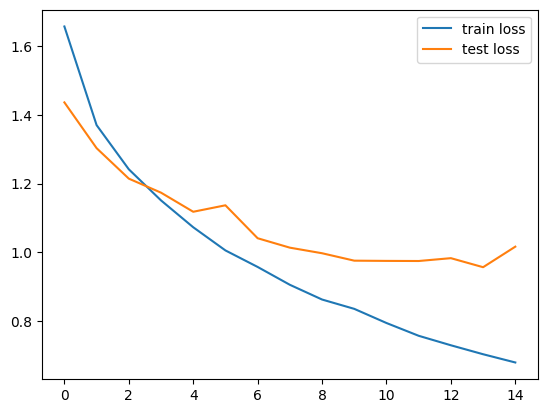

In [ ]:
# 시각화
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()